<a href="https://colab.research.google.com/github/Pudi-Bheemesh/AutismDetectorByPhoto/blob/main/Draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.12.0
Hub version: 0.14.0
GPU available (YESS!!!!)


In [ ]:
# importing necessary libraries
import os
import random
import gc
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data_dir = "drive/MyDrive/data/AutismDataset"
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)

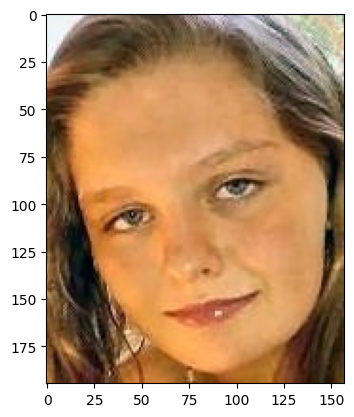

In [ ]:
img = cv2.imread(os.path.join(data_dir,"train","Autistic.18.jpg"))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
data_directory = "drive/MyDrive/data/AutismDataset/consolidated"
data = tf.keras.utils.image_dataset_from_directory(data_directory,image_size=(256,256))

Found 2940 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#If 0 then autistic
#If 1 then non autistic
batch[1]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

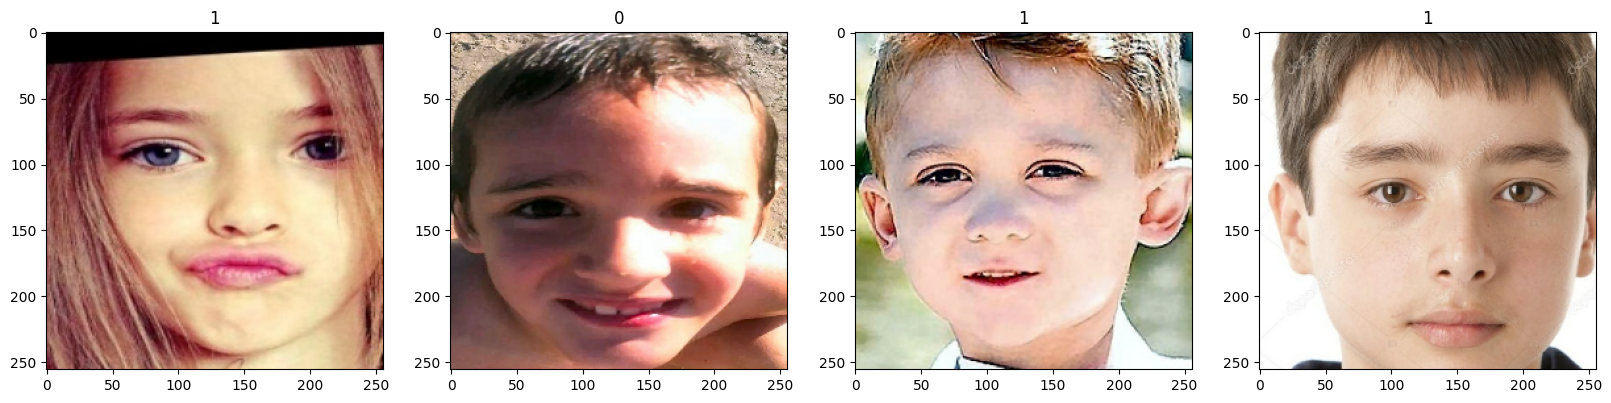

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0] /255
scaled.max()

1.0

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# Classification
# Enhanced Layerwise Sequential CNN algorithm
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()

# ConvLayer_1
model.add(Conv2D(16, activation="relu", kernel_size=5, strides=1, input_shape=(256, 256, 3), padding="same"))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=2, strides=2, padding="valid"))

# ConvLayer_2
model.add(Conv2D(64, activation="relu", kernel_size=5, strides=1, padding="valid"))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=2, strides=2, padding="valid"))

# ConvLayer_3
model.add(Conv2D(128, activation="relu", kernel_size=5, strides=1, padding="valid"))

model.add(Flatten())
model.add(Dense(258, activation="relu"))
model.add(Dense(2, activation="softmax"))

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      1216      
                                                                 
 average_pooling2d_2 (Averag  (None, 128, 128, 16)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 64)      25664     
                                                                 
 average_pooling2d_3 (Averag  (None, 62, 62, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 58, 128)       204928    
                                                                 
 flatten_1 (Flatten)         (None, 430592)           

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [ ]:
logdir = "drive/MyDrive/data/logs"

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=32, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/32
55/55 [==============================] - 190s 3s/step - loss: 1.4756 - accuracy: 0.5409 - val_loss: 0.6719 - val_accuracy: 0.6215
Epoch 2/32
55/55 [==============================] - 18s 318ms/step - loss: 0.6575 - accuracy: 0.6295 - val_loss: 0.6141 - val_accuracy: 0.7072
Epoch 3/32
55/55 [==============================] - 22s 392ms/step - loss: 0.5687 - accuracy: 0.7068 - val_loss: 0.6160 - val_accuracy: 0.6852
Epoch 4/32
55/55 [==============================] - 17s 296ms/step - loss: 0.4965 - accuracy: 0.7540 - val_loss: 0.5831 - val_accuracy: 0.7072
Epoch 5/32
55/55 [==============================] - 16s 274ms/step - loss: 0.4175 - accuracy: 0.8114 - val_loss: 0.6556 - val_accuracy: 0.6852
Epoch 6/32
55/55 [==============================] - 16s 278ms/step - loss: 0.3170 - accuracy: 0.8699 - val_loss: 0.6588 - val_accuracy: 0.7292
Epoch 7/32
55/55 [==============================] - 28s 492ms/step - loss: 0.1607 - accuracy: 0.9409 - val_loss: 0.9302 - val_accuracy: 0.7338
E

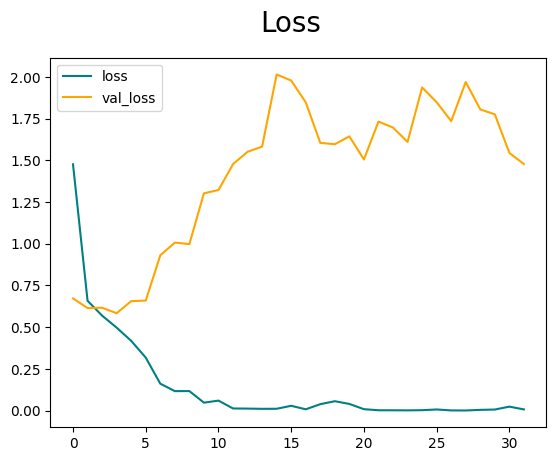

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

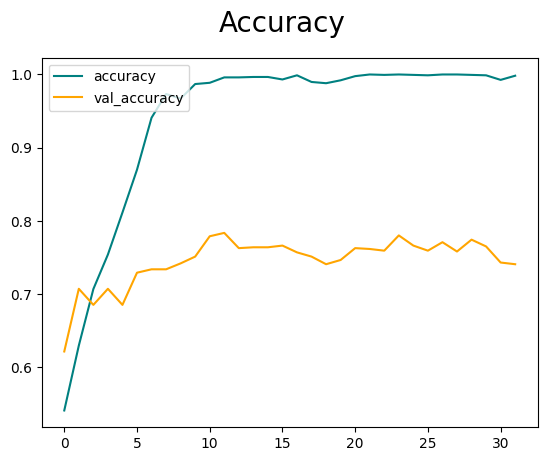

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 132ms/step


ValueError: ignored

In [ ]:
print(f"Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test,pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test,pred))